<a href="https://colab.research.google.com/github/s2tandu0p/lol_win_predict/blob/main/Shaohua_Guan_Project_2_Part_2_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. LOAD DATA

In [152]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
import pandas as pd


In [154]:
ytrain_data = pd.read_csv('/content/drive/MyDrive/Personal/Dojo/data/lol win predict/lol-prediction/lol.y_train.csv')
xtrain_data = pd.read_csv('/content/drive/MyDrive/Personal/Dojo/data/lol win predict/lol-prediction/lol.x_train.csv')



In [155]:
ytrain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Unnamed: 0  180000 non-null  int64
 1   blueWins    180000 non-null  int64
dtypes: int64(2)
memory usage: 2.7 MB


In [156]:
xtrain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 49 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               180000 non-null  int64  
 1   gameDuraton              180000 non-null  int64  
 2   blueFirstBlood           180000 non-null  int64  
 3   blueFirstTower           180000 non-null  int64  
 4   blueFirstBaron           180000 non-null  int64  
 5   blueFirstDragon          180000 non-null  int64  
 6   blueFirstInhibitor       180000 non-null  int64  
 7   blueDragonKills          180000 non-null  int64  
 8   blueBaronKills           180000 non-null  int64  
 9   blueTowerKills           180000 non-null  int64  
 10  blueInhibitorKills       180000 non-null  int64  
 11  blueWardPlaced           180000 non-null  int64  
 12  blueWardkills            180000 non-null  int64  
 13  blueKills                180000 non-null  int64  
 14  blue

In [157]:
df = pd.merge(xtrain_data, ytrain_data, on='Unnamed: 0', how='inner')

In [158]:
df.head()

,Unnamed: 0,gameDuraton,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,Rank_Challenger,Rank_GrandMaster,Rank_Master,blueWins
0,0,1906,0,1,1,1,1,3,2,9,2,62,45,43,26,74,135355,68241,555,81,16.2,238,12,60207,95456,0,0,0,1,0,2,0,84,29,26,43,38,100705,56484,677,74,14.8,134,9,52184,15764,0,1,0,1
1,1,1454,0,1,1,1,0,3,1,4,0,48,17,40,25,53,75736,52100,418,66,13.2,149,7,27543,57961,0,0,0,0,0,2,0,49,13,25,40,35,70660,45894,502,61,12.2,123,7,13236,15042,0,0,1,1
2,2,1449,1,1,0,0,0,3,0,4,0,69,25,20,21,29,71486,46522,515,63,12.6,191,4,27921,58575,1,1,1,1,1,6,1,71,23,21,20,39,58082,46759,556,67,13.4,105,5,13959,46455,0,1,0,0
3,3,1832,0,0,0,0,0,0,0,3,0,59,20,28,48,34,74430,55078,613,73,14.6,128,5,23641,23832,0,1,1,4,0,10,3,67,17,48,28,55,113195,66805,592,79,15.8,239,13,38586,80341,0,0,1,0
4,4,1098,0,0,0,0,0,0,0,1,0,0,0,41,58,83,96554,58327,235,84,16.8,0,10,26543,2262,0,0,1,0,0,4,2,0,0,58,41,165,126815,63002,215,89,17.8,0,18,24834,9434,0,0,1,0


#1. PREPROCESSING

1.1 drop Unnamed: 0 and gameDuration

In [159]:
df.drop(columns = 'Unnamed: 0', inplace = True)
df.drop(columns = 'gameDuraton', inplace = True)

In [160]:
df.head()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,Rank_Challenger,Rank_GrandMaster,Rank_Master,blueWins
0,0,1,1,1,1,3,2,9,2,62,45,43,26,74,135355,68241,555,81,16.2,238,12,60207,95456,0,0,0,1,0,2,0,84,29,26,43,38,100705,56484,677,74,14.8,134,9,52184,15764,0,1,0,1
1,0,1,1,1,0,3,1,4,0,48,17,40,25,53,75736,52100,418,66,13.2,149,7,27543,57961,0,0,0,0,0,2,0,49,13,25,40,35,70660,45894,502,61,12.2,123,7,13236,15042,0,0,1,1
2,1,1,0,0,0,3,0,4,0,69,25,20,21,29,71486,46522,515,63,12.6,191,4,27921,58575,1,1,1,1,1,6,1,71,23,21,20,39,58082,46759,556,67,13.4,105,5,13959,46455,0,1,0,0
3,0,0,0,0,0,0,0,3,0,59,20,28,48,34,74430,55078,613,73,14.6,128,5,23641,23832,0,1,1,4,0,10,3,67,17,48,28,55,113195,66805,592,79,15.8,239,13,38586,80341,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,41,58,83,96554,58327,235,84,16.8,0,10,26543,2262,0,0,1,0,0,4,2,0,0,58,41,165,126815,63002,215,89,17.8,0,18,24834,9434,0,0,1,0


1.2 drop 

redFirstBaron, 

redFirstDragon, 

redFirstInhibitor

the reason for dropping those columns is that if the blue team has first Baron, first Dragon, or first Inhibitor, the red team does not have it. 

hence the columns mentioned above do not provide more information to our model.

hence they are dropped.

In [161]:
df.drop(['redFirstBaron', 'redFirstDragon', 'redFirstInhibitor'], axis = 1, inplace = True)

In [162]:
df.describe()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,Rank_Challenger,Rank_GrandMaster,Rank_Master,blueWins
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,0.506417,0.515911,0.236850,0.403989,0.383089,1.357122,0.297956,4.346922,0.647078,53.451811,19.553489,24.719028,24.715044,40.381844,69508.705950,47930.598339,500.304911,64.721017,12.944203,123.979122,5.689328,24406.048122,37140.719656,1.520278,0.329861,4.276550,0.633406,53.592750,19.230794,24.627178,24.802800,40.250350,69243.808922,48024.272394,505.713339,64.919106,12.983821,125.821456,5.682533,24783.643228,36907.188461,0.134417,0.329389,0.536194,0.496167
std,0.499960,0.499748,0.425151,0.490697,0.486141,1.254191,0.534926,3.377698,0.909368,30.321885,14.660043,13.520038,13.531695,29.107680,37380.061363,16045.629393,177.278823,14.790687,2.958137,65.940683,3.623118,15229.316206,26573.703379,1.307996,0.559185,3.393461,0.902027,30.570029,14.441143,13.518854,13.535851,29.036728,37399.856240,16249.836099,181.020754,14.925502,2.985100,66.836866,3.630526,15411.891358,26907.350033,0.341100,0.469993,0.498690,0.499987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3355.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,33.000000,8.000000,15.000000,15.000000,20.000000,41591.000000,36549.750000,383.000000,55.000000,11.000000,83.000000,3.000000,13342.000000,13676.000000,0.000000,0.000000,1.000000,0.000000,33.000000,8.000000,15.000000,15.000000,20.000000,41322.000000,36481.000000,386.000000,55.000000,11.000000,84.000000,3.000000,13618.000000,12781.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,53.000000,18.000000,24.000000,24.000000,35.000000,64543.000000,47903.000000,516.000000,66.000000,13.200000,126.000000,5.000000,21353.000000,33176.000000,1.000000,0.000000,4.000000,0.000000,53.000000,18.000000,24.000000,24.000000,35.000000,64282.000000,48020.000000,522.000000,66.000000,13.200000,128.000000,5.000000,21737.500000,32484.500000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,7.000000,1.000000,73.000000,29.000000,33.000000,33.000000,54.000000,90896.250000,58817.000000,623.000000,75.000000,15.000000,169.000000,8.000000,32078.250000,56835.000000,2.000000,1.000000,7.000000,1.000000,73.000000,28.000000,33.000000,33.000000,54.000000,90696.000000,59104.250000,631.000000,75.000000,15.000000,172.000000,8.000000,32596.000000,57

1.3 Rank_Challenger, Rank_GrandMaster, Rank_Master

about 54% of the games are Rank_Master
about 33% of the games are Rank_GrandMaster
about 13% of the games are Rank_Challenger

In League of Legends, of all competitive ranked players

.12% are Master tier

.029% are Grandmaster tier

.013% are Challenger tier
source: https://support-leagueoflegends.riotgames.com/hc/en-us/articles/4405776545427-Master-Grandmaster-and-Challenger-The-Apex-Tiers

in our data, 13% of 180,000 data points is 23,400

which i believe is enough for this project

hence, i'm going to drop the data points for 

Rank_Master and Rank_GrandMaster

Advantages of doing so:
1. less data that will result in a faster calculation
2. the model will be specifically focusing on Rank_Challenger games

In [163]:
df_Challenger = df[df.Rank_Challenger == 1]

In [164]:
df_Challenger.head()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,Rank_Challenger,Rank_GrandMaster,Rank_Master,blueWins
8,1,1,1,1,1,2,1,10,2,64,13,29,15,48,72946,54669,586,68,13.6,174,8,20301,72112,1,0,2,0,52,9,15,29,19,52357,40242,518,59,11.8,112,3,33019,17949,1,0,0,1
10,1,0,0,1,0,1,0,0,0,30,9,9,25,9,27499,25741,344,46,9.2,75,3,6376,18897,1,0,10,2,30,9,25,9,29,44101,42307,506,57,11.4,105,5,18517,39714,1,0,0,0
13,0,0,0,1,0,4,1,5,0,101,34,38,27,93,143432,71249,747,85,17.0,236,6,45544,60555,2,1,7,1,91,42,26,38,63,114175,63252,690,78,15.6,198,7,48050,72472,1,0,0,1
21,0,0,1,1,0,3,1,4,0,63,29,30,18,62,68530,49501,546,68,13.6,174,8,28304,56882,0,0,2,0,83,20,18,30,25,47992,42236,545,61,12.2,131,3,18041,23314,1,0,0,1
22,1,0,1,1,1,3,1,6,1,70,34,28,25,72,93383,57629,611,74,14.8,185,7,28273,55090,1,0,4,0,85,27,25,29,55,71894,54475,621,68,13.6,177,6,27083,42240,1,0,0,1


In [165]:
# since i've created df_Challenger that's only for Rank_Challenger games
# i can drop the columns Rank_Challenger, Rank_GrandMaster, Rank_Master

df_Challenger.drop(['Rank_Challenger', 'Rank_GrandMaster', 'Rank_Master'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [166]:
df_Challenger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24195 entries, 8 to 179994
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blueFirstBlood           24195 non-null  int64  
 1   blueFirstTower           24195 non-null  int64  
 2   blueFirstBaron           24195 non-null  int64  
 3   blueFirstDragon          24195 non-null  int64  
 4   blueFirstInhibitor       24195 non-null  int64  
 5   blueDragonKills          24195 non-null  int64  
 6   blueBaronKills           24195 non-null  int64  
 7   blueTowerKills           24195 non-null  int64  
 8   blueInhibitorKills       24195 non-null  int64  
 9   blueWardPlaced           24195 non-null  int64  
 10  blueWardkills            24195 non-null  int64  
 11  blueKills                24195 non-null  int64  
 12  blueDeath                24195 non-null  int64  
 13  blueAssist               24195 non-null  int64  
 14  blueChampionDamageDea

In [167]:
# drop duplicates
df_Challenger.drop_duplicates()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,blueWins
8,1,1,1,1,1,2,1,10,2,64,13,29,15,48,72946,54669,586,68,13.6,174,8,20301,72112,1,0,2,0,52,9,15,29,19,52357,40242,518,59,11.8,112,3,33019,17949,1
10,1,0,0,1,0,1,0,0,0,30,9,9,25,9,27499,25741,344,46,9.2,75,3,6376,18897,1,0,10,2,30,9,25,9,29,44101,42307,506,57,11.4,105,5,18517,39714,0
13,0,0,0,1,0,4,1,5,0,101,34,38,27,93,143432,71249,747,85,17.0,236,6,45544,60555,2,1,7,1,91,42,26,38,63,114175,63252,690,78,15.6,198,7,48050,72472,1
21,0,0,1,1,0,3,1,4,0,63,29,30,18,62,68530,49501,546,68,13.6,174,8,28304,56882,0,0,2,0,83,20,18,30,25,47992,42236,545,61,12.2,131,3,18041,23314,1
22,1,0,1,1,1,3,1,6,1,70,34,28,25,72,93383,57629,611,74,14.8,185,7,28273,55090,1,0,4,0,85,27,25,29,55,71894,54475,621,68,13.6,177,6,27083,42240,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179947,1,0,1,0,1,2,2,11,3,81,24,35,16,56,79812,61965,578,77,15.4,238,5,58102,96570,3,0,2,0,51,19,16,35,30,69426,50264,735,70,14.0,162,4,18722,32282,1
179961,0,1,0,1,0,2,0,4,0,62,16,31,31,39,66318,52468,596,64,12.8,130,7,28343,24799,1,1,10,2,50,15,28,31,60,84390,55561,546,73,14.6,164,7,40564,53720,0
179975,0,0,0,0,0,0,0,1,0,41,15,15,32,22,42869,34883,449,54,10.8,77,4,7609,10125,2,0,3,0,51,12,32,15,57,53370,43701,459,63,12.6,111,5,19354,31237,0
179980,0,1,0,0,1,1,0,6,1,53,12,24,9,29,56082,41226,486,58,11.6,98,4,12489,32364,2,0,0,0,46,13,9,24,15,39449,30792,418,48,9.6,72,3,17925,22116,1


In [168]:
df_Challenger.describe()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,blueWins
count,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000
mean,0.504071,0.525770,0.243852,0.408514,0.367431,1.389543,0.306262,4.394668,0.618971,58.579211,22.315230,24.163505,24.138128,39.940070,69653.715974,48118.702955,520.104774,64.983468,12.996694,129.467452,5.551643,24999.932011,38358.943501,1.560942,0.335565,4.248068,0.581070,58.756520,21.901343,24.058442,24.242529,39.709527,69381.972928,48152.048150,526.060012,65.171110,13.034222,130.387435,5.529738,25484.031907,37589.471378,0.501095
std,0.499994,0.499346,0.429413,0.491569,0.482115,1.246961,0.535374,3.327041,0.900486,31.292619,15.482489,12.920780,13.030776,27.736516,35716.870768,15463.874503,175.735908,14.062367,2.812473,64.640878,3.487660,15054.083404,26319.841931,1.298776,0.558718,3.322484,0.867462,31.586971,15.263579,13.012561,12.940020,27.718175,35812.626815,15624.681947,178.830590,14.105862,2.821172,64.492855,3.486564,15384.278576,26479.789833,0.500009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3757.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3340.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,11.000000,15.000000,15.000000,20.000000,43064.000000,37100.500000,409.000000,56.000000,11.200000,90.000000,3.000000,14069.000000,15572.500000,0.000000,0.000000,1.000000,0.000000,38.000000,10.000000,15.000000,15.000000,20.000000,42973.000000,37042.000000,412.000000,56.000000,11.200000,91.000000,3.000000,14463.500000,14481.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,58.000000,21.000000,23.000000,23.000000,36.000000,64922.000000,48046.000000,534.000000,66.000000,13.200000,131.000000,5.000000,21960.000000,34954.000000,1.000000,0.000000,4.000000,0.000000,58.000000,20.000000,23.000000,23.000000,35.000000,64495.000000,47983.000000,540.000000,66.000000,13.200000,132.000000,5.000000,22331.000000,33279.000000,1.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,7.000000,1.000000,79.000000,32.000000,32.000000,32.000000,53.000000,90141.500000,58633.000000,639.000000,75.000000,15.000000,173.000000,7.000000,32667.500000,57759.000000,3.000000,1.000000,7.000000,1.000000,79.000000,31.000000,32.000000,32.000000,53.000000,89764.500000,58667.500000,648.000000,75.000000,15.000000,174.000000,7.000000,33169.000000,57692.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,4.000000,11.000000,9.000000,219.000000,103.000000,99.000000,102.000000,238.000000,319398.000000,121903.000000,1267.000000,123.000000,24.600000,402.000000,29.000000,162442.000000,167

In [169]:
# from .describe() i can tell the data is balanced
# below is the value_counts()
df_Challenger['blueWins'].value_counts()

1    12124
0    12071
Name: blueWins, dtype: int64

1.4 blueTotalLevel

in League of Legends, the max level a player could get in every game is 18 in most game modes

there are 5 players on either blue or red side

that the max level for each team is 18x5=90

from the .describe() above we can see the max for blueTotalLevel is 123

hence i'm going to drop the rows where the blueTotalLevel is more than 90

then i'm going to check if the processed data set has redTotalLevel more than 90 and drop those rows as well.

In [170]:
df_Challenger = df_Challenger[df_Challenger.blueTotalLevel <= 90]

In [171]:
df_Challenger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24100 entries, 8 to 179994
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blueFirstBlood           24100 non-null  int64  
 1   blueFirstTower           24100 non-null  int64  
 2   blueFirstBaron           24100 non-null  int64  
 3   blueFirstDragon          24100 non-null  int64  
 4   blueFirstInhibitor       24100 non-null  int64  
 5   blueDragonKills          24100 non-null  int64  
 6   blueBaronKills           24100 non-null  int64  
 7   blueTowerKills           24100 non-null  int64  
 8   blueInhibitorKills       24100 non-null  int64  
 9   blueWardPlaced           24100 non-null  int64  
 10  blueWardkills            24100 non-null  int64  
 11  blueKills                24100 non-null  int64  
 12  blueDeath                24100 non-null  int64  
 13  blueAssist               24100 non-null  int64  
 14  blueChampionDamageDea

In [172]:
df_Challenger.describe()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,blueWins
count,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000,24100.000000
mean,0.504232,0.526058,0.242946,0.408050,0.366971,1.385021,0.304938,4.382448,0.614855,58.593195,22.377303,24.002116,23.978714,39.830747,69267.265685,47933.289170,520.221369,64.843900,12.968780,129.603444,5.512573,24932.706224,38191.579087,1.558506,0.334979,4.238257,0.578216,58.754564,21.967510,23.899378,24.080373,39.608672,69001.325062,47969.394813,526.189876,65.038963,13.007793,130.502075,5.493071,25428.508838,37443.032863,0.500705
std,0.499992,0.499331,0.428872,0.491483,0.481988,1.244539,0.534700,3.323580,0.895305,31.333265,15.475538,12.666919,12.778826,27.711794,35195.207403,15200.262512,176.020502,13.903407,2.780681,64.688158,3.430912,14981.052370,26175.947914,1.297207,0.558340,3.320407,0.863994,31.622247,15.253091,12.761446,12.683574,27.687401,35275.911157,15364.027460,179.100100,13.958271,2.791654,64.536717,3.434531,15312.357059,26341.360559,0.500010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3757.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3340.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,11.000000,15.000000,15.000000,20.000000,43003.500000,37049.750000,408.000000,56.000000,11.200000,90.000000,3.000000,14032.750000,15487.250000,0.000000,0.000000,1.000000,0.000000,38.000000,11.000000,15.000000,15.000000,20.000000,42864.000000,36994.000000,411.000000,56.000000,11.200000,91.000000,3.000000,14446.000000,14396.750000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,58.000000,21.000000,23.000000,23.000000,35.000000,64774.500000,47974.000000,534.000000,66.000000,13.200000,131.000000,5.000000,21911.000000,34767.000000,1.000000,0.000000,4.000000,0.000000,58.000000,20.000000,23.000000,23.000000,35.000000,64328.000000,47895.000000,541.000000,66.000000,13.200000,132.000000,5.000000,22289.500000,33122.000000,1.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,7.000000,1.000000,79.000000,32.000000,32.000000,32.000000,53.000000,89770.750000,58511.500000,639.000000,75.000000,15.000000,173.000000,7.000000,32597.250000,57605.000000,3.000000,1.000000,7.000000,1.000000,79.000000,31.000000,32.000000,32.000000,53.000000,89396.500000,58517.500000,648.000000,75.000000,15.000000,174.000000,7.000000,33120.250000,57561.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,4.000000,11.000000,9.000000,219.000000,103.000000,99.000000,102.000000,238.000000,319398.000000,118212.000000,1267.000000,90.000000,18.000000,402.000000,25.000000,162442.000000,1676

1.5 redTotalLevel

i see that the max for redTotalLevel is 108
repeat the same steps we did for blueTotalLevel

In [173]:
df_Challenger = df_Challenger[df_Challenger.redTotalLevel <= 90]
df_Challenger.describe()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,blueWins
count,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.00000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000
mean,0.504382,0.526106,0.242949,0.408224,0.366937,1.384881,0.304964,4.380893,0.614455,58.602451,22.396719,23.974413,23.933209,39.816282,69207.003946,47897.798962,520.312939,64.822056,12.964411,129.672482,5.506625,24930.996469,38175.251589,1.557466,0.334579,4.233396,0.576739,58.760789,21.986044,23.854206,24.052669,39.584922,68914.575244,47925.16270,526.258442,65.008100,13.001620,130.528266,5.482326,25420.427871,37398.415202,0.501101
std,0.499991,0.499328,0.428874,0.491515,0.481979,1.244640,0.534704,3.323851,0.895081,31.344882,15.470720,12.641651,12.702043,27.717157,35158.982699,15167.464719,176.083099,13.893762,2.778752,64.679994,3.425950,14981.672817,26171.243284,1.296932,0.558230,3.317999,0.862793,31.634590,15.249618,12.685890,12.658347,27.684680,35181.521696,15309.47715,179.173491,13.932013,2.786403,64.556594,3.417887,15311.820219,26305.846853,0.500009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3757.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3340.00000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,11.000000,15.000000,15.000000,20.000000,42995.500000,37036.000000,408.000000,56.000000,11.200000,90.000000,3.000000,14031.000000,15469.000000,0.000000,0.000000,1.000000,0.000000,38.000000,11.000000,15.000000,15.000000,20.000000,42848.000000,36980.00000,411.000000,56.000000,11.200000,91.000000,3.000000,14440.000000,14381.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,58.000000,21.000000,23.000000,23.000000,35.000000,64722.000000,47958.000000,534.000000,66.000000,13.200000,131.000000,5.000000,21907.000000,34740.000000,1.000000,0.000000,4.000000,0.000000,58.000000,20.000000,23.000000,23.000000,35.000000,64278.000000,47879.00000,541.000000,66.000000,13.200000,132.000000,5.000000,22280.000000,33097.000000,1.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,7.000000,1.000000,79.000000,32.000000,32.000000,32.000000,53.000000,89711.000000,58468.000000,639.000000,75.000000,15.000000,173.000000,7.000000,32600.500000,57585.000000,3.000000,1.000000,7.000000,1.000000,79.000000,31.000000,32.000000,32.000000,53.000000,89323.000000,58487.50000,648.000000,75.000000,15.000000,174.000000,7.000000,33114.000000,57514.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,4.000000,11.000000,9.000000,219.000000,103.000000,99.000000,102.000000,238.000000,319398.000000,118212.000000,1267.000000,90.000000,18.000000,402.000000,25.000000,162442.000000,167692.0000

In [174]:
df_Challenger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24075 entries, 8 to 179994
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blueFirstBlood           24075 non-null  int64  
 1   blueFirstTower           24075 non-null  int64  
 2   blueFirstBaron           24075 non-null  int64  
 3   blueFirstDragon          24075 non-null  int64  
 4   blueFirstInhibitor       24075 non-null  int64  
 5   blueDragonKills          24075 non-null  int64  
 6   blueBaronKills           24075 non-null  int64  
 7   blueTowerKills           24075 non-null  int64  
 8   blueInhibitorKills       24075 non-null  int64  
 9   blueWardPlaced           24075 non-null  int64  
 10  blueWardkills            24075 non-null  int64  
 11  blueKills                24075 non-null  int64  
 12  blueDeath                24075 non-null  int64  
 13  blueAssist               24075 non-null  int64  
 14  blueChampionDamageDea

1.6 Remove Outliers

In [175]:
# blueWardPlaced 
df_Challenger = df_Challenger[df_Challenger.blueWardPlaced < 100]
df_Challenger.describe()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,blueWins
count,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000,21773.000000
mean,0.506131,0.524365,0.217379,0.402517,0.351812,1.275617,0.250034,4.153401,0.569513,52.511643,19.807101,23.355762,23.352455,38.382584,65261.474349,45912.495706,494.171681,63.241078,12.648216,120.825977,5.348551,23143.105498,35157.074174,1.452900,0.280990,4.033206,0.537271,53.717356,19.072016,23.272080,23.435907,38.280807,65033.186240,45972.076655,499.479217,63.460433,12.692087,121.934460,5.337850,23601.818720,34563.235797,0.499058
std,0.499974,0.499417,0.412472,0.490416,0.477547,1.191730,0.476665,3.299865,0.856400,25.928590,13.299728,12.830335,12.885153,28.192557,33439.287833,14287.631479,161.317281,13.548095,2.709619,60.010584,3.469983,13624.755461,24509.307855,1.257002,0.501463,3.302949,0.824121,28.016826,12.393743,12.867508,12.849093,28.145418,33515.948732,14468.092036,163.901689,13.618080,2.723616,60.385491,3.462728,13949.296421,24848.656049,0.500011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3757.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3340.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,36.000000,10.000000,14.000000,14.000000,19.000000,40860.000000,35865.000000,393.000000,55.000000,11.000000,85.000000,3.000000,13324.000000,13775.000000,0.000000,0.000000,1.000000,0.000000,36.000000,10.000000,14.000000,14.000000,19.000000,40796.000000,35821.000000,396.000000,55.000000,11.000000,86.000000,3.000000,13688.000000,12657.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,54.000000,19.000000,22.000000,22.000000,33.000000,60830.000000,46101.000000,515.000000,64.000000,12.800000,124.000000,5.000000,20507.000000,31368.000000,1.000000,0.000000,3.000000,0.000000,55.000000,19.000000,22.000000,22.000000,33.000000,60615.000000,45967.000000,521.000000,64.000000,12.800000,125.000000,5.000000,20832.000000,29758.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,7.000000,1.000000,72.000000,29.000000,31.000000,31.000000,51.000000,83586.000000,55781.000000,607.000000,72.000000,14.400000,162.000000,7.000000,29943.000000,53535.000000,2.000000,1.000000,7.000000,1.000000,73.000000,28.000000,31.000000,31.000000,50.000000,83784.000000,55971.000000,615.000000,73.000000,14.600000,163.000000,7.000000,30696.000000,53849.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,11.000000,9.000000,99.000000,88.000000,99.000000,102.000000,238.000000,319398.000000,118212.000000,1063.000000,90.000000,18.000000,347.000000,25.000000,162442.000000,130787

In [176]:
# blueKill
df_Challenger = df_Challenger[df_Challenger.blueKills < 40]
df_Challenger.describe()


,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,blueWins
count,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000,19566.000000
mean,0.500664,0.513033,0.209598,0.414955,0.311970,1.278238,0.236891,3.975672,0.471277,54.531228,20.638659,20.467904,21.549065,32.271645,58785.058111,43605.834356,502.655985,61.197179,12.239436,124.808239,4.610191,21839.414597,34968.998722,1.534141,0.295155,4.146939,0.520546,55.840744,20.018042,21.481192,20.541807,34.164060,59758.034141,44217.613104,508.799857,61.801850,12.360370,127.731780,4.877645,22832.471890,35969.763876,0.471328
std,0.500012,0.499843,0.407032,0.492727,0.463309,1.161379,0.462496,3.283771,0.786266,23.711966,12.728342,9.580598,11.174714,19.359344,26280.637159,12764.111051,155.464062,12.462157,2.492431,53.847010,2.611265,12529.713770,23663.376965,1.245912,0.507671,3.367776,0.804512,25.864428,11.913554,11.173823,9.587024,22.575098,27825.598750,13451.148494,157.040456,12.859783,2.571957,54.949615,2.968246,13441.032535,24651.340103,0.499190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3757.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3340.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,11.000000,13.000000,13.000000,17.000000,38849.500000,34796.000000,411.000000,54.000000,10.800000,91.000000,3.000000,12784.000000,15219.500000,0.000000,0.000000,1.000000,0.000000,38.000000,11.000000,13.000000,13.000000,17.000000,38744.250000,34804.250000,415.000000,54.000000,10.800000,92.000000,3.000000,13185.250000,14761.750000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,55.000000,20.000000,21.000000,21.000000,30.000000,57020.000000,44247.000000,520.000000,62.000000,12.400000,126.000000,5.000000,19529.500000,31411.500000,1.000000,0.000000,4.000000,0.000000,56.000000,19.000000,21.000000,21.000000,31.000000,57020.500000,44438.000000,527.000000,63.000000,12.600000,128.000000,5.000000,20176.000000,31688.500000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,7.000000,1.000000,72.000000,29.000000,28.000000,29.000000,45.000000,76231.750000,52858.000000,608.000000,70.000000,14.000000,161.000000,6.000000,28283.500000,52442.250000,2.000000,1.000000,7.000000,1.000000,73.000000,28.000000,29.000000,28.000000,47.000000,77982.750000,54110.500000,616.000000,71.000000,14.200000,165.000000,7.000000,29821.750000,55199.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,11.000000,5.000000,99.000000,88.000000,39.000000,85.000000,124.000000,187749.000000,88274.000000,1063.000000,90.000000,18.000000,347.000000,14.000000,125123.000000,130787.000

In [177]:
# blueDeath
df_Challenger = df_Challenger[df_Challenger.blueDeath < 40]
df_Challenger.describe()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,blueWins
count,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000
mean,0.510131,0.528486,0.216558,0.425980,0.327505,1.314107,0.243791,4.091776,0.491394,54.862473,20.843845,20.043845,19.988943,31.386057,56991.035131,43023.643736,504.620697,60.592048,12.118410,126.483224,4.523203,21603.349619,35779.500436,1.500654,0.275436,3.938072,0.456917,55.993682,20.091667,19.922386,20.111329,31.303976,56767.372222,43039.032516,509.813399,60.807625,12.161525,127.408279,4.505610,22017.803704,34914.783497,0.499292
std,0.499911,0.499201,0.411910,0.494504,0.469316,1.163649,0.467169,3.316669,0.797370,22.958875,12.563228,9.553042,9.559446,18.858566,25371.294321,12737.383471,152.180852,12.396640,2.479328,52.094208,2.595484,12453.701797,23711.928376,1.222731,0.490229,3.304083,0.760923,25.080020,11.670608,9.562134,9.553980,18.945900,25444.817367,12891.982044,154.418896,12.501418,2.500284,52.272526,2.596841,12799.812743,23989.983356,0.500013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3757.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3340.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,11.000000,13.000000,13.000000,17.000000,37736.750000,34305.750000,414.000000,53.000000,10.600000,92.000000,3.000000,12577.000000,15902.250000,0.000000,0.000000,1.000000,0.000000,38.000000,11.000000,12.000000,13.000000,17.000000,37649.000000,34244.500000,417.000000,53.000000,10.600000,93.000000,3.000000,12851.000000,14679.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,55.000000,20.000000,20.000000,20.000000,29.000000,55175.500000,43578.000000,520.000000,62.000000,12.400000,126.000000,4.000000,19261.500000,32364.500000,1.000000,0.000000,3.000000,0.000000,55.000000,19.000000,20.000000,20.000000,29.000000,54573.500000,43339.000000,525.000000,62.000000,12.400000,127.000000,4.000000,19479.500000,30471.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,7.000000,1.000000,72.000000,29.000000,27.000000,27.000000,44.000000,74050.250000,52322.750000,607.000000,69.000000,13.800000,161.000000,6.000000,27998.250000,53371.250000,2.000000,1.000000,7.000000,1.000000,72.000000,28.000000,27.000000,28.000000,44.000000,73628.250000,52485.250000,614.000000,70.000000,14.000000,163.000000,6.000000,28773.000000,53330.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,11.000000,5.000000,99.000000,88.000000,39.000000,39.000000,124.000000,161364.000000,84176.000000,1063.000000,90.000000,18.000000,347.000000,14.000000,125123.000000,130787.00000

summary: from 180,000 rows to 18,360 rows we have cleaned our data.

#2. UNIVARIATE VISUALS

2.1  corr

In [178]:
df_Challenger.head()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,blueWins
8,1,1,1,1,1,2,1,10,2,64,13,29,15,48,72946,54669,586,68,13.6,174,8,20301,72112,1,0,2,0,52,9,15,29,19,52357,40242,518,59,11.8,112,3,33019,17949,1
10,1,0,0,1,0,1,0,0,0,30,9,9,25,9,27499,25741,344,46,9.2,75,3,6376,18897,1,0,10,2,30,9,25,9,29,44101,42307,506,57,11.4,105,5,18517,39714,0
21,0,0,1,1,0,3,1,4,0,63,29,30,18,62,68530,49501,546,68,13.6,174,8,28304,56882,0,0,2,0,83,20,18,30,25,47992,42236,545,61,12.2,131,3,18041,23314,1
22,1,0,1,1,1,3,1,6,1,70,34,28,25,72,93383,57629,611,74,14.8,185,7,28273,55090,1,0,4,0,85,27,25,29,55,71894,54475,621,68,13.6,177,6,27083,42240,1
32,1,1,1,1,1,2,1,5,1,60,24,22,6,29,65447,46273,562,65,13.0,150,5,35895,70642,1,0,2,0,57,25,6,22,14,48944,36630,588,58,11.6,119,1,17196,23356,1


In [179]:
df_Challenger.reset_index(drop=True, inplace=True)
df_Challenger.head()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,blueWins
0,1,1,1,1,1,2,1,10,2,64,13,29,15,48,72946,54669,586,68,13.6,174,8,20301,72112,1,0,2,0,52,9,15,29,19,52357,40242,518,59,11.8,112,3,33019,17949,1
1,1,0,0,1,0,1,0,0,0,30,9,9,25,9,27499,25741,344,46,9.2,75,3,6376,18897,1,0,10,2,30,9,25,9,29,44101,42307,506,57,11.4,105,5,18517,39714,0
2,0,0,1,1,0,3,1,4,0,63,29,30,18,62,68530,49501,546,68,13.6,174,8,28304,56882,0,0,2,0,83,20,18,30,25,47992,42236,545,61,12.2,131,3,18041,23314,1
3,1,0,1,1,1,3,1,6,1,70,34,28,25,72,93383,57629,611,74,14.8,185,7,28273,55090,1,0,4,0,85,27,25,29,55,71894,54475,621,68,13.6,177,6,27083,42240,1
4,1,1,1,1,1,2,1,5,1,60,24,22,6,29,65447,46273,562,65,13.0,150,5,35895,70642,1,0,2,0,57,25,6,22,14,48944,36630,588,58,11.6,119,1,17196,23356,1


In [180]:
df_Challenger.describe()

,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,blueWins
count,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000,18360.000000
mean,0.510131,0.528486,0.216558,0.425980,0.327505,1.314107,0.243791,4.091776,0.491394,54.862473,20.843845,20.043845,19.988943,31.386057,56991.035131,43023.643736,504.620697,60.592048,12.118410,126.483224,4.523203,21603.349619,35779.500436,1.500654,0.275436,3.938072,0.456917,55.993682,20.091667,19.922386,20.111329,31.303976,56767.372222,43039.032516,509.813399,60.807625,12.161525,127.408279,4.505610,22017.803704,34914.783497,0.499292
std,0.499911,0.499201,0.411910,0.494504,0.469316,1.163649,0.467169,3.316669,0.797370,22.958875,12.563228,9.553042,9.559446,18.858566,25371.294321,12737.383471,152.180852,12.396640,2.479328,52.094208,2.595484,12453.701797,23711.928376,1.222731,0.490229,3.304083,0.760923,25.080020,11.670608,9.562134,9.553980,18.945900,25444.817367,12891.982044,154.418896,12.501418,2.500284,52.272526,2.596841,12799.812743,23989.983356,0.500013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3757.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3340.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,11.000000,13.000000,13.000000,17.000000,37736.750000,34305.750000,414.000000,53.000000,10.600000,92.000000,3.000000,12577.000000,15902.250000,0.000000,0.000000,1.000000,0.000000,38.000000,11.000000,12.000000,13.000000,17.000000,37649.000000,34244.500000,417.000000,53.000000,10.600000,93.000000,3.000000,12851.000000,14679.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,55.000000,20.000000,20.000000,20.000000,29.000000,55175.500000,43578.000000,520.000000,62.000000,12.400000,126.000000,4.000000,19261.500000,32364.500000,1.000000,0.000000,3.000000,0.000000,55.000000,19.000000,20.000000,20.000000,29.000000,54573.500000,43339.000000,525.000000,62.000000,12.400000,127.000000,4.000000,19479.500000,30471.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,7.000000,1.000000,72.000000,29.000000,27.000000,27.000000,44.000000,74050.250000,52322.750000,607.000000,69.000000,13.800000,161.000000,6.000000,27998.250000,53371.250000,2.000000,1.000000,7.000000,1.000000,72.000000,28.000000,27.000000,28.000000,44.000000,73628.250000,52485.250000,614.000000,70.000000,14.000000,163.000000,6.000000,28773.000000,53330.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,11.000000,5.000000,99.000000,88.000000,39.000000,39.000000,124.000000,161364.000000,84176.000000,1063.000000,90.000000,18.000000,347.000000,14.000000,125123.000000,130787.00000

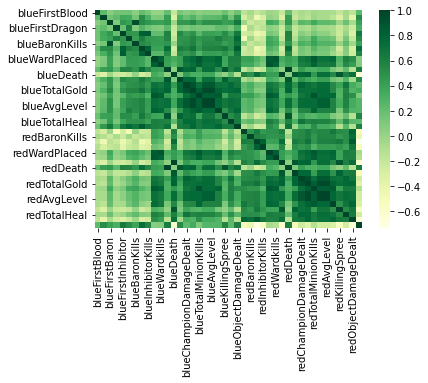

In [181]:
import seaborn as sns
corr = df_Challenger.corr()
sns.heatmap(corr, cmap = 'YlGn');

In [182]:
 sig_corr = corr.loc[abs(corr['blueWins']) >= 0.5]
 sig_corr.index
 for i in sig_corr.index:
     print('The absolute correlation coefficient of Blue Team Wins vs.', i, 'is', abs(sig_corr.loc[i]['blueWins']))

The absolute correlation coefficient of Blue Team Wins vs. blueFirstTower is 0.5211891565593849
The absolute correlation coefficient of Blue Team Wins vs. blueFirstInhibitor is 0.6412787999765784
The absolute correlation coefficient of Blue Team Wins vs. blueDragonKills is 0.5318839413111451
The absolute correlation coefficient of Blue Team Wins vs. blueTowerKills is 0.7327588520385552
The absolute correlation coefficient of Blue Team Wins vs. blueInhibitorKills is 0.5622381897370853
The absolute correlation coefficient of Blue Team Wins vs. blueKills is 0.6163453691668153
The absolute correlation coefficient of Blue Team Wins vs. blueDeath is 0.6075062767145276
The absolute correlation coefficient of Blue Team Wins vs. blueAssist is 0.5261363918412413
The absolute correlation coefficient of Blue Team Wins vs. blueKillingSpree is 0.564462067550781
The absolute correlation coefficient of Blue Team Wins vs. blueObjectDamageDealt is 0.6063150497098887
The absolute correlation coefficient 